# Preprocessing - Whitening or Sphering

## 1 | Necessary Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

## 2 | Set Data

In [21]:
x = np.array([
    [1, 2, 3, 4, 5],
    [11, 12, 13, 14, 15]
])

print(x.shape)
x

(2, 5)


array([[ 1,  2,  3,  4,  5],
       [11, 12, 13, 14, 15]])

In [22]:
xT = x.T
xc = xT - np.mean(xT, axis=0)
xc = xc.T
xc

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

In [23]:
xCov = np.cov(xc, rowvar=True, bias=True)
xCov

array([[2., 2.],
       [2., 2.]])

## 3 | Linear Algebra

In [24]:
w, v = linalg.eig(xCov)
print('Eigen Values = \n', w)
print('Eigen Vectors = \n', v)

Eigen Values = 
 [4.0000000e+00+0.j 4.4408921e-16+0.j]
Eigen Vectors = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [25]:
w.real.round(4)

array([4., 0.])

In [26]:
diagW = np.diag(1 / (w ** .5))
diagW

array([[5.00000000e-01+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 4.74531328e+07+0.j]])

In [27]:
xRot = np.dot(v, xc)
xRot

array([[-4.44089210e-16, -2.22044605e-16,  0.00000000e+00,
         2.22044605e-16,  4.44089210e-16],
       [-2.82842712e+00, -1.41421356e+00,  0.00000000e+00,
         1.41421356e+00,  2.82842712e+00]])

## 4 | Whitening using PCA

In [28]:
wPCA = np.dot(np.dot(diagW, v.T), xc)
wPCA

array([[-1.41421356e+00+0.j, -7.07106781e-01+0.j,  0.00000000e+00+0.j,
         7.07106781e-01+0.j,  1.41421356e+00+0.j],
       [-2.23517418e-08+0.j, -1.11758709e-08+0.j,  0.00000000e+00+0.j,
         1.11758709e-08+0.j,  2.23517418e-08+0.j]])

## 5 | Whitening using ZCA

In [29]:
wZCA = np.dot(np.dot(np.dot(v, diagW), v.T), xc)
wZCA

array([[-0.99999999+0.j, -0.49999999+0.j,  0.        +0.j,
         0.49999999+0.j,  0.99999999+0.j],
       [-1.00000001+0.j, -0.50000001+0.j,  0.        +0.j,
         0.50000001+0.j,  1.00000001+0.j]])

## 6 | EDA

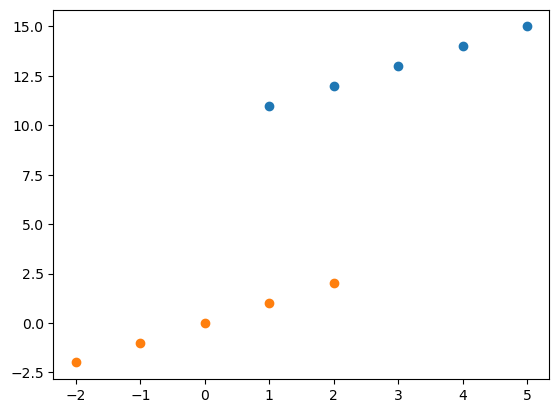

In [30]:
plt.scatter(x[0, :], x[1, :])
plt.scatter(xc[0, :], xc[1, :])
plt.show()

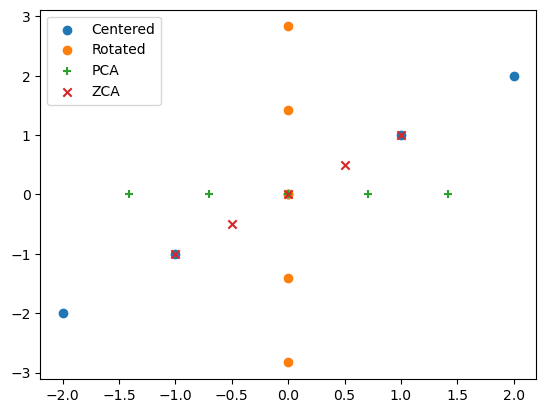

In [31]:
plt.scatter(xc[0, :], xc[1, :], label='Centered')
plt.scatter(xRot[0, :], xRot[1, :], label='Rotated')
plt.scatter(wPCA[0, :], wPCA[1, :], label='PCA', marker='+')
plt.scatter(wZCA[0, :], wZCA[1, :], label='ZCA', marker='x')
plt.legend()
plt.show()

## 7 | Final

In [32]:
np.random.seed(1)
mu = [0, 0]
sigma = [
    [6, 5], [5, 6]
]
n = 1000
x = np.random.multivariate_normal(mu, sigma, size=n)
print(x.shape)

(1000, 2)


In [33]:
xc = x - np.mean(x, axis=0)
xc = xc.T
print(xc.shape)

(2, 1000)


In [34]:
xCov = np.cov(xc, rowvar=True, bias=True)
w, v = linalg.eig(xCov)
diagW = np.diag(1 / (w ** 0.5))
wPCA = np.dot(np.dot(diagW, v.T), xc)
wZCA = np.dot(np.dot(v, np.dot(diagW, v.T)), xc)

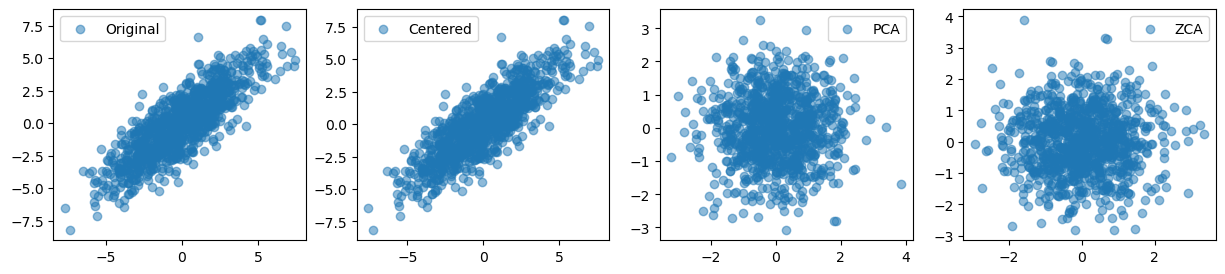

In [35]:
fig = plt.figure(figsize=(15, 3))
plt.subplot(1, 4, 1)
plt.scatter(x[:, 0], x[:, 1], label='Original', alpha=0.5)
plt.legend()

plt.subplot(1, 4, 2)
plt.scatter(xc[0, :], xc[1, :], label='Centered', alpha=0.5)
plt.legend()

plt.subplot(1, 4, 3)
plt.scatter(wPCA[0, :], wPCA[1, :], label='PCA', alpha=0.5)
plt.legend()

plt.subplot(1, 4, 4)
plt.scatter(wZCA[0, :], wZCA[1, :], label='ZCA', alpha=0.5)
plt.legend()

plt.show()

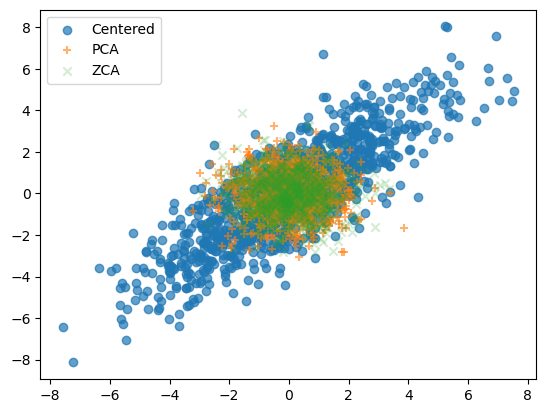

In [36]:
plt.scatter(xc[0, :], xc[1, :], label='Centered', alpha=0.7)
plt.scatter(wPCA[0, :], wPCA[1, :], label='PCA', alpha=0.6 , marker='+')
plt.scatter(wZCA[0, :], wZCA[1, :], label='ZCA', alpha=0.2 , marker='x')

plt.legend()
plt.show()